In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [123]:
df=pd.read_csv(r"/kaggle/input/ford-car-price-prediction/ford.csv")

In [124]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [125]:
df.shape

(17966, 9)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [127]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [128]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

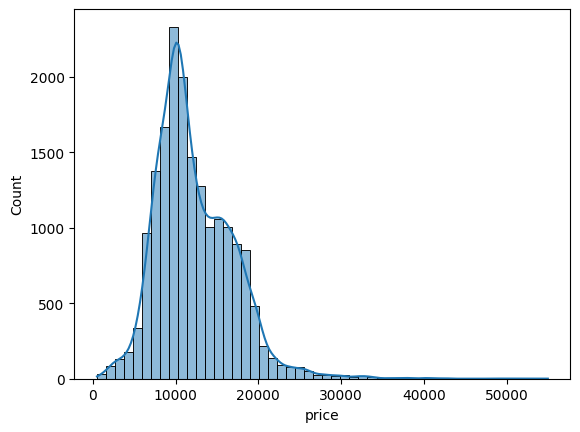

In [129]:
#EDA
#we are seeing the distribution of price
sns.histplot(x=df['price'],bins=50,kde=True)

Checking the correlation of dependent to independent


<Axes: >

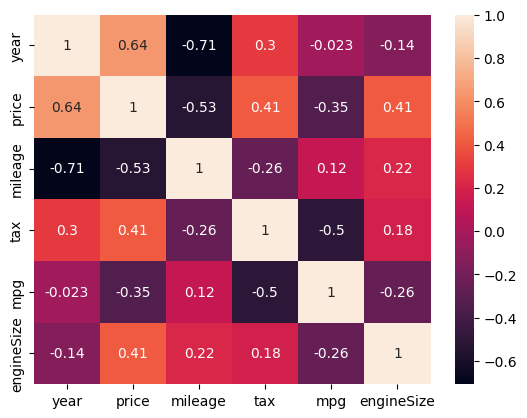

In [130]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

How correlation with specific columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

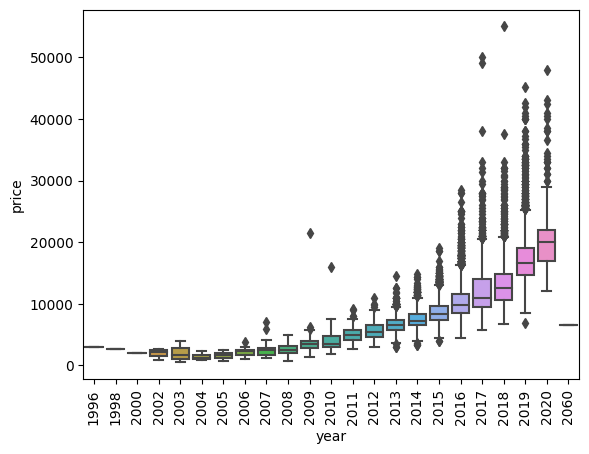

In [131]:
sns.boxplot(data=df,x='year',y='price')
plt.xticks(rotation=90)

There is heavy relation between year and price

<Axes: xlabel='mileage', ylabel='price'>

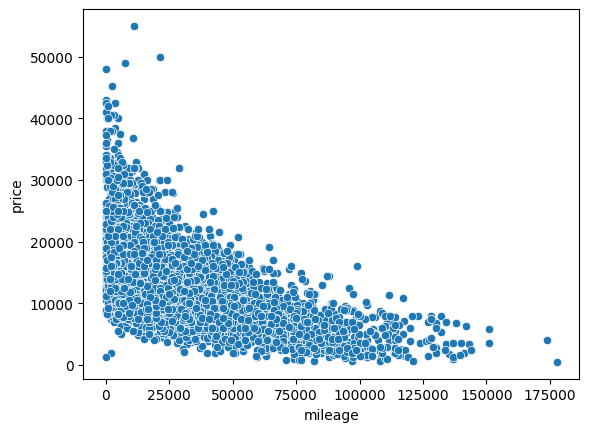

In [132]:
sns.scatterplot(data=df,x='mileage',y='price')

In [133]:
##realtion is 0.5 price with milege

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.1'),
  Text(3, 0, '1.2'),
  Text(4, 0, '1.3'),
  Text(5, 0, '1.4'),
  Text(6, 0, '1.5'),
  Text(7, 0, '1.6'),
  Text(8, 0, '1.7'),
  Text(9, 0, '1.8'),
  Text(10, 0, '2.0'),
  Text(11, 0, '2.2'),
  Text(12, 0, '2.3'),
  Text(13, 0, '2.5'),
  Text(14, 0, '3.2'),
  Text(15, 0, '5.0')])

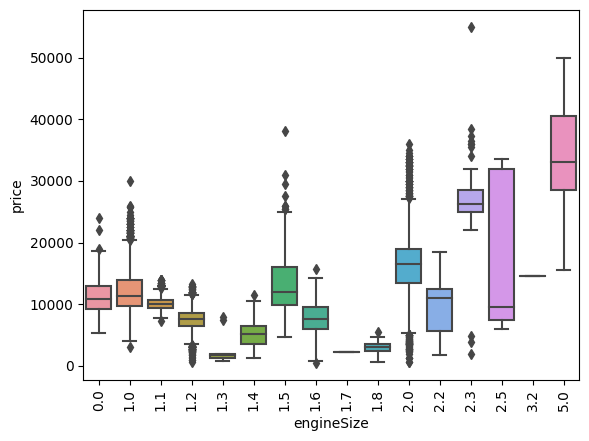

In [134]:
sns.boxplot(data=df,x='engineSize',y='price')
plt.xticks(rotation=90)

In [135]:
##we will use year milage enginesize seems heavly correlated with price

<Axes: xlabel='transmission', ylabel='price'>

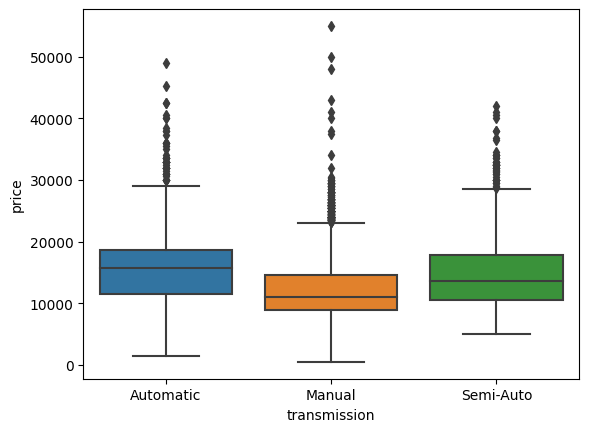

In [136]:
sns.boxplot(data=df,x='transmission',y='price')

In [137]:
#seems to equal price for all not more correlated

In [138]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='fuelType', ylabel='price'>

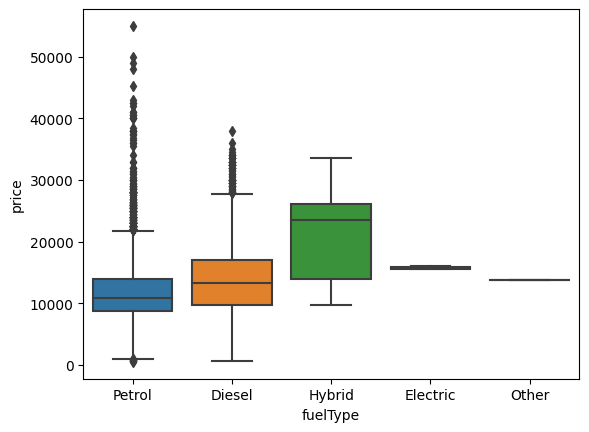

In [139]:
sns.boxplot(data=df,x='fuelType',y='price')

there is specific corrrelaion with fuel type

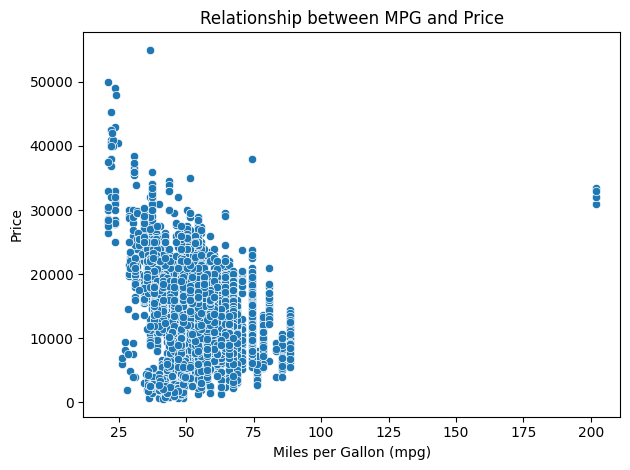

In [140]:
sns.scatterplot(data=df, x='mpg', y='price')
plt.title('Relationship between MPG and Price')
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel('Price')
plt.tight_layout()
#miles per gallon


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

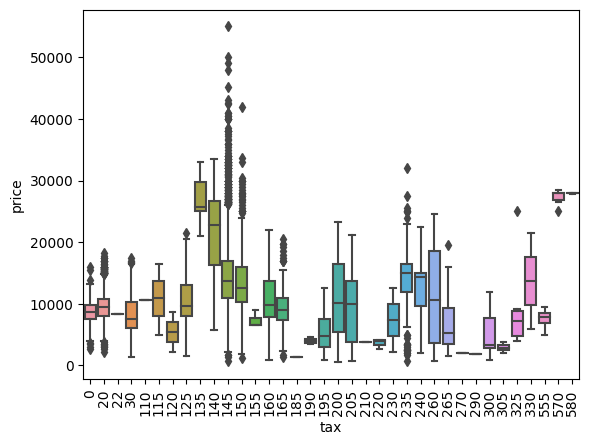

In [141]:
sns.boxplot(data=df,x='tax',y='price')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

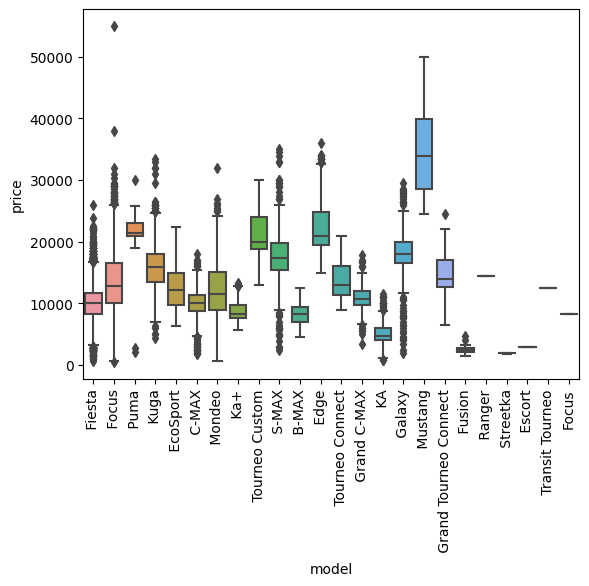

In [142]:
sns.boxplot(data=df,x='model',y='price')
plt.xticks(rotation=90)

In [143]:
X=df.drop(columns=['price'],axis=1)
y=df['price']

In [144]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [145]:
df.columns


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

we are now encoding the categorical colums

In [146]:
X_one_encode=pd.get_dummies(X,columns=['model','transmission','fuelType'],drop_first=True)

In [147]:
X_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [148]:
##label encoding

from sklearn.preprocessing import LabelEncoder

columns=['model','transmission','fuelType']

Xlabel=X.copy()
label_encoders={}

for col in columns:
    le=LabelEncoder()
    Xlabel[col]=le.fit_transform(Xlabel[col].astype(str))
    label_encoders[col]=le
    

In [149]:
Xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [150]:
Xlabel['model'].value_counts()

model
5     6557
6     4588
13    2225
2     1143
1      543
12     531
14     526
0      355
18     296
9      247
8      228
3      208
11     199
16      80
21      69
10      59
15      57
20      33
7       16
19       2
17       1
4        1
22       1
23       1
Name: count, dtype: int64

In [151]:
##std values
from sklearn.preprocessing import StandardScaler

In [152]:
numerical_col=['year','mileage','tax','mpg','engineSize']
scaler=StandardScaler()
X_one_encode[numerical_col]=scaler.fit_transform(X_one_encode[numerical_col])

In [153]:
X_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.020442,-0.811386,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,0.552866,-0.733359,0.591358,-0.020442,-0.811386,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.065128,-0.560132,0.591358,-0.020442,-0.811386,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1.040605,-0.662640,0.510727,-1.738890,0.345070,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,1.040605,-1.123724,0.510727,-0.909294,-0.811386,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.067312,0.113779,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,-1.398088,0.890398,-1.343791,-0.020442,-0.811386,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,-0.910349,-0.839822,-1.505053,0.927668,0.576362,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,0.552866,-0.942690,0.510727,-0.020442,-0.348804,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [154]:
Xlabel.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [155]:
Xlabel[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']]=scaler.fit_transform(Xlabel[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])

In [156]:
Xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


In [157]:
##we are making two model from one hot encodeing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.33, random_state=42)

In [159]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [160]:
y_pred=model.predict(X_test)

In [161]:
y_pred

array([ 6676.74792864,  9175.10363172,  9876.15109278, ...,
       19944.5783948 ,  5551.82314202, 10177.30406554])

In [162]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [163]:
r2=r2_score(y_test,y_pred)
r2

0.8402100144860558

In [164]:
n=X_test.shape[0]
p=X_test.shape[1]
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.8392882534566235

In [165]:
##for labelling 
X_train_lb, X_test_lb, y_train, y_test = train_test_split(Xlabel, y, test_size=0.33, random_state=42)

In [166]:
model2=LinearRegression()
model2.fit(X_train_lb,y_train)

LinearRegression()

In [167]:
y_pred2=model2.predict(X_test_lb)
y_pred2

array([ 6157.52473246,  9286.53653694,  9519.82817502, ...,
       19580.21385231,  7384.33202962,  9960.74790235])

In [168]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [169]:
n=X_test_lb.shape[0]
p=X_test_lb.shape[1]
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.8399940820731991

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [172]:
model3 = DecisionTreeRegressor(random_state=42)
model3.fit(X_train_lb, y_train)

DecisionTreeRegressor(random_state=42)

In [173]:
y_pred_lb = model3.predict(X_test_lb)

In [174]:
score = r2_score(y_test, y_pred_lb)
print("R² Score:", score)

R² Score: 0.8787358817495705


In [175]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


        Feature  Importance
1          year    0.496263
7    engineSize    0.232236
0         model    0.097736
6           mpg    0.085818
3       mileage    0.072171
5           tax    0.008963
2  transmission    0.005762
4      fuelType    0.001050


In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Create importance DataFrame
importance = pd.DataFrame({
    'Feature': Xlabel.columns,
    'Importance': model3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


        Feature  Importance
1          year    0.496263
7    engineSize    0.232236
0         model    0.097736
6           mpg    0.085818
3       mileage    0.072171
5           tax    0.008963
2  transmission    0.005762
4      fuelType    0.001050


In [179]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
